In [1]:
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hellocomsol import hellodata, arg_and_path
from scipy.integrate import simps

In [2]:
%%capture
from tqdm.autonotebook import tqdm
tqdm().pandas()

In [3]:
df = pd.read_csv('curr.csv')
df.head()

,t,x,y,U,sr,thr,fn,fg
0,0.0,0.000005,5.000000e-07,0.006851,14438.761,-2.215876e-35,1.951681e-15,0.0045
1,0.1,0.000005,5.000000e-07,0.006842,14419.346,4.061563e-35,-1.539766e-34,0.0045
2,0.2,0.000005,5.000000e-07,0.006842,14419.346,1.952872e-33,-2.338661e-26,0.0045
3,0.3,0.000005,5.000000e-07,0.006842,14419.346,3.842124e-35,-7.896191e-25,0.0045
4,0.4,0.000005,5.000000e-07,0.006842,14419.346,4.026753e-35,2.815794e-23,0.0045


Создаю срезы по оси $x$. 

In [4]:
cut_line_step = df[(df.x > 3e-4) & (df.x < 9.5e-4)].x.unique()[::3]
cut_line_step

array([0.000305, 0.000335, 0.000365, 0.000395, 0.000425, 0.000455,
       0.000485, 0.000515, 0.000545, 0.000575, 0.000605, 0.000635,
       0.000665, 0.000695, 0.000725, 0.000755, 0.000785, 0.000815,
       0.000845, 0.000875, 0.000905, 0.000935])

Создаю хранилище для подсчитанных значений интегралов

In [5]:
I_keeper = np.empty((cut_line_step.size, df.t.unique().size))

for i, x_cut in enumerate(tqdm(cut_line_step, desc="X loop")):
    for j, time_cut in enumerate(df.t.unique()):
        at_tx = df[(df['x'] == x_cut) & (df['t'] == time_cut)]
        x = at_tx.y
        y = at_tx.fn
        I_keeper[i][j]= simps(y, x)

Здесь изменение этих интегралов во времени, сперва обычное, потом зум к месту значимых изменений. 

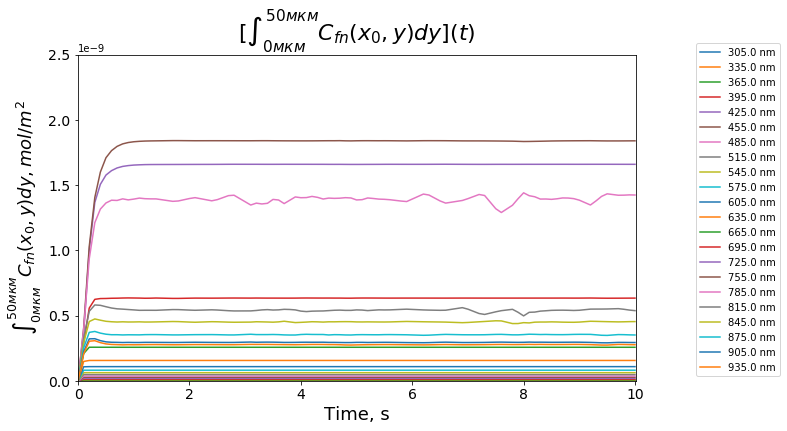

In [6]:
plt.figure(figsize=(10, 6))
for i, x_cur in enumerate(cut_line_step):
    plt.plot(df.t.unique(), I_keeper[i], label="{} nm".format(round(x_cur*1e6, 1)))
plt.xlim(-0.01, 10.01)
plt.ylim(0, 2.5e-9)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("$[\int_{0 мкм}^{50 мкм} C_{fn}(x_{0}, y) dy](t)$", fontsize=22)
plt.xlabel("Time, s", fontsize=18)
plt.ylabel("$\int_{0 мкм}^{50 мкм} C_{fn}(x_{0}, y) dy, mol/m^{2}$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.show()

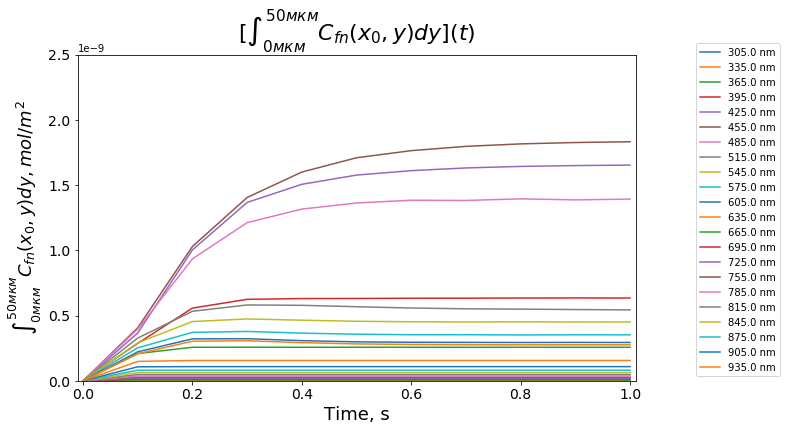

In [7]:
plt.figure(figsize=(10, 6))
for i, x_cur in enumerate(cut_line_step):
    plt.plot(df.t.unique()[np.where(df.t.unique() <= 1)],
             I_keeper[i][np.where(df.t.unique() <= 1)],
             label="{} nm".format(round(x_cur*1e6, 1)))
plt.xlim(-0.01, 1.01)
plt.ylim(0, 2.5e-9)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("$[\int_{0 мкм}^{50 мкм} C_{fn}(x_{0}, y) dy](t)$", fontsize=22)
plt.xlabel("Time, s", fontsize=18)
plt.ylabel("$\int_{0 мкм}^{50 мкм} C_{fn}(x_{0}, y) dy, mol/m^{2}$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.show()

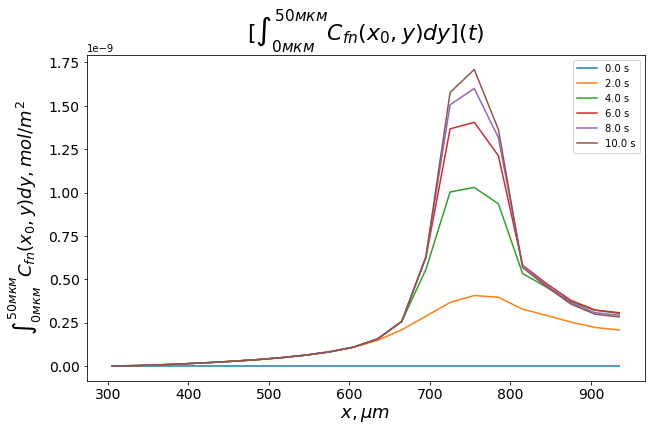

In [8]:
plt.figure(figsize=(10, 6))
for j, t_cur in enumerate(df.t.unique()[::20]):
    plt.plot(cut_line_step*1e6,
             I_keeper[:,j],
             label="{} s".format(t_cur))
# plt.xlim(-0.01, 1.01)
# plt.ylim(0, 2.5e-9)
plt.legend()
plt.title("$[\int_{0 мкм}^{50 мкм} C_{fn}(x_{0}, y) dy](t)$", fontsize=22)
plt.xlabel("$x, \mu m$", fontsize=18)
plt.ylabel("$\int_{0 мкм}^{50 мкм} C_{fn}(x_{0}, y) dy, mol/m^{2}$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.show()

**ВОПРОС**

Значит ли это, что все изменения, по сути, устанавливаются вообще за минуту?

Зафиксируем время $t=10$с, рассмотрим изменения _thr, fn, velocity_ от $y$ при разных $x_{0}$. Для этого модифицирую последовательность срезов, чтобы получить более наглядные и доступные для сравнения графики в областях значительных изменений. 

In [9]:
# setting t=10
df_t = df[df.t == 10]

# линия среза
cut_line_step = df[(df.x > 3e-4) & (df.x < 9.5e-4)].x.unique()[::5]
cut_line_step

array([0.000305, 0.000355, 0.000405, 0.000455, 0.000505, 0.000555,
       0.000605, 0.000655, 0.000705, 0.000755, 0.000805, 0.000855,
       0.000905])

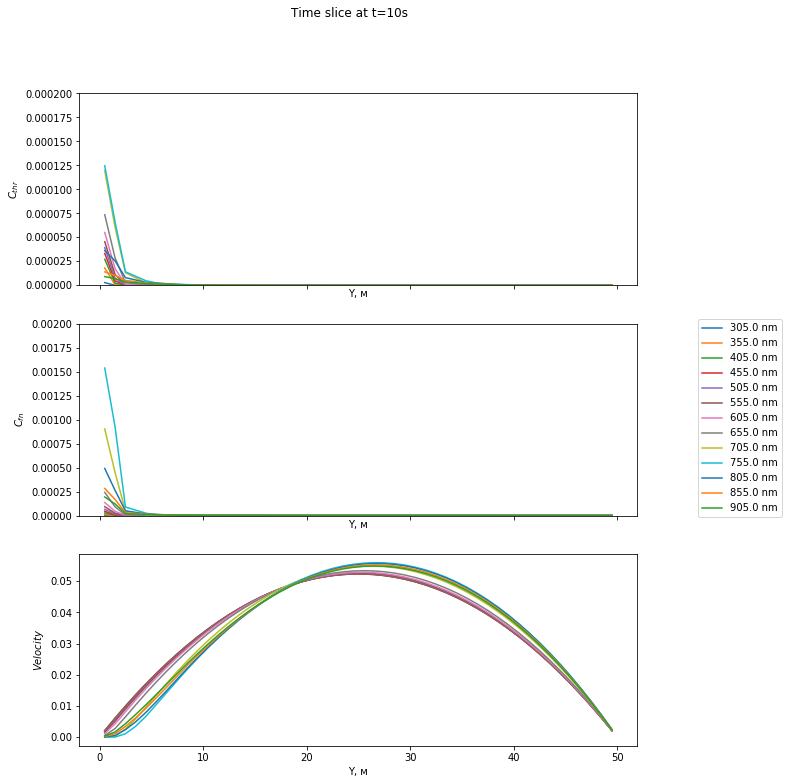

In [10]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 12))
for x_cut in tqdm(cut_line_step, desc="X loop"):
    at_tx = df_t[df_t.x == x_cut]

    ax1.plot(at_tx.y*1e6, at_tx.thr, label="{} nm".format(round(x_cut*1e6)))

    ax2.plot(at_tx.y*1e6, at_tx.fn, label="{} nm".format(round(x_cut*1e6)))

    ax3.plot(at_tx.y*1e6, at_tx.U, label="{} nm".format(round(x_cut*1e6)))

for ax in (ax1, ax2, ax3):
    ax.set_xlabel("Y, м")
    
ax1.set_ylim(0, 2e-4)
ax2.set_ylim(0, 2e-3)

ax1.set_ylabel("$C_{thr}$")
ax2.set_ylabel("$C_{fn}$")
ax3.set_ylabel("$Velocity$")

ax2.legend(bbox_to_anchor=(1.1, 1.05))

f.suptitle("Time slice at t=10s")
plt.show()

Слишком большой масштаб. не видно, сделаем срез $y \leqslant 10$ мкм. 

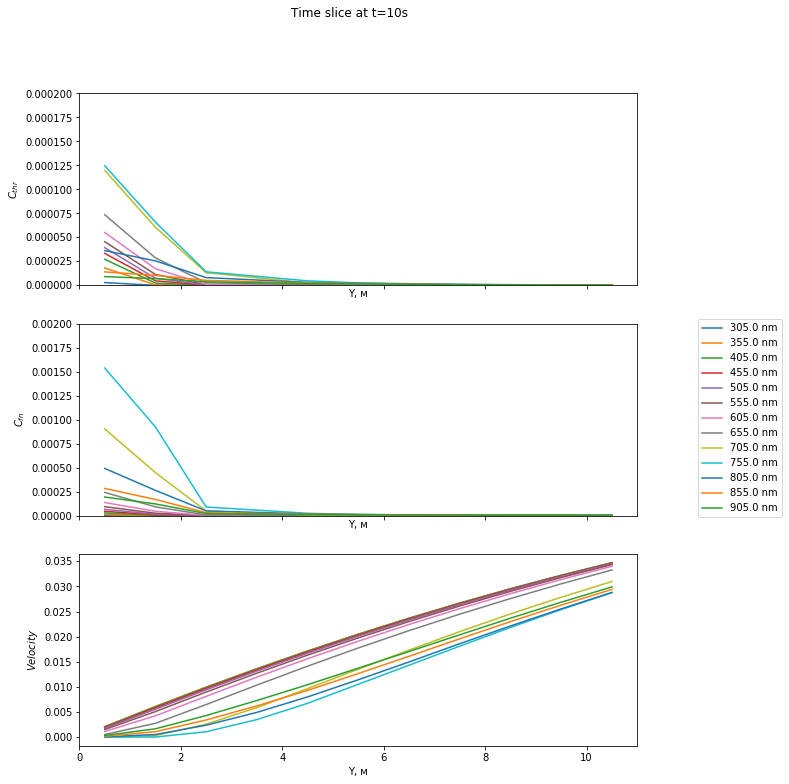

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 12))
for x_cut in tqdm(cut_line_step, desc="X loop"):
    at_tx = df_t[(df_t.x == x_cut) & (df_t.y <= 1.1e-5)]

    ax1.plot(at_tx.y*1e6, at_tx.thr, label="{} nm".format(round(x_cut*1e6)))

    ax2.plot(at_tx.y*1e6, at_tx.fn, label="{} nm".format(round(x_cut*1e6)))

    ax3.plot(at_tx.y*1e6, at_tx.U, label="{} nm".format(round(x_cut*1e6)))

for ax in (ax1, ax2, ax3):
#     ax.set_xlim(0, 1e-5)
    ax.set_xlabel("Y, м")
    
ax1.set_ylim(0, 2e-4)
ax2.set_ylim(0, 2e-3)

ax1.set_ylabel("$C_{thr}$")
ax2.set_ylabel("$C_{fn}$")
ax3.set_ylabel("$Velocity$")

ax2.legend(bbox_to_anchor=(1.1, 1.05))

f.suptitle("Time slice at t=10s")
plt.show()

Из этой мешанины значений выделим 4 значения для срезов по $x: 705 nm, 755 nm, 805 nm, 855 nm$. 

In [12]:
new_cut = df[(df.x > 7e-4) & (df.x < 9.e-4)].x.unique()

In [13]:
new_cut

array([0.000705, 0.000715, 0.000725, 0.000735, 0.000745, 0.000755,
       0.000765, 0.000775, 0.000785, 0.000795, 0.000805, 0.000815,
       0.000825, 0.000835, 0.000845, 0.000855, 0.000865, 0.000875,
       0.000885, 0.000895])

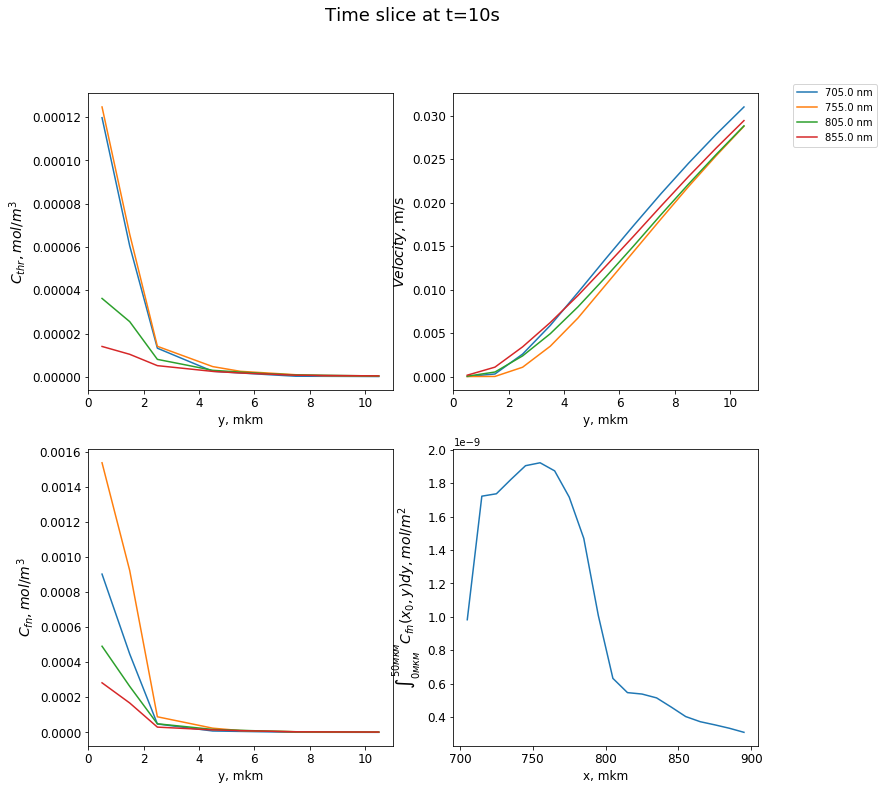

In [14]:
f, axs = plt.subplots(2, 2, figsize=(12, 12))
I_new_cut = np.empty(new_cut.size)
for i, x_cut in enumerate(tqdm(new_cut[::5], desc="X loop")):
    at_tx = df_t[(df_t.x == x_cut) & (df_t.y <= 1.1e-5)]

    axs[0, 0].plot(at_tx.y*1e6, at_tx.thr, label="{} nm".format(round(x_cut*1e6)))
    axs[1, 0].plot(at_tx.y*1e6, at_tx.fn, label="{} nm".format(round(x_cut*1e6)))
    axs[0, 1].plot(at_tx.y*1e6, at_tx.U, label="{} nm".format(round(x_cut*1e6)))

for i, x_cut in enumerate(tqdm(new_cut, desc="X loop")):
    at_tx = df_t[(df_t.x == x_cut) & (df_t.y <= 1.1e-5)]
    I_new_cut[i] = simps(at_tx.fn, at_tx.y)
    
axs[1, 1].plot(new_cut*1e6, I_new_cut)

axs[0, 0].set_ylabel("$C_{thr}, mol/m^{3}$", fontsize=14)
axs[1, 0].set_ylabel("$C_{fn}, mol/m^{3}$", fontsize=14)
axs[0, 1].set_ylabel("$Velocity$, m/s", fontsize=14)
axs[1, 1].set_ylabel("$\int_{0 мкм}^{50 мкм} C_{fn}(x_{0}, y) dy, mol/m^{2}$", fontsize=14)

axs[0, 0].set_xlabel("y, mkm", fontsize=12)
axs[1, 0].set_xlabel("y, mkm", fontsize=12)
axs[0, 1].set_xlabel("y, mkm", fontsize=12)
axs[1, 1].set_xlabel("x, mkm", fontsize=12)

axs[0, 1].legend(bbox_to_anchor=(1.1, 1.05))

for ax in axs.ravel():
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)

f.suptitle("Time slice at t=10s", fontsize=18)
plt.show()

Осталось найти положения максимума концентрации фибрина в различные моменты времени, а также их положения. 

In [15]:
max_df = pd.DataFrame()

In [16]:
for t_step in df.t.unique()[::5]:
    at_t = df[df.t == t_step].reset_index()
    max_row = at_t.iloc[at_t['fn'].idxmax()]
    max_df = max_df.append(max_row)

In [17]:
# посмотрим, двигается ли максимум
print(max_df.x.unique(), max_df.y.unique())

[0.000795 0.000745] [5.e-07]


Положение максимума не двигается! Рассмотрим изменение значения максимума во времени:

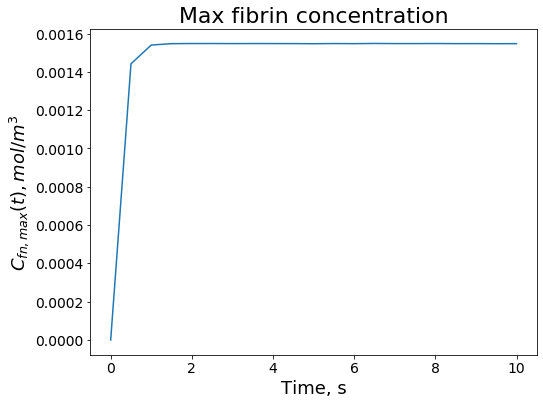

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(max_df.t, max_df.fn, label="Max Fn conc")
plt.title("Max fibrin concentration", fontsize=22)
plt.xlabel("Time, s", fontsize=18)
plt.ylabel("$C_{fn, max}(t), mol/m^{3}$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.show()